In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
print(" tous les package exist ")

 tous les package exist 


In [3]:
#!pip install numpy
#!pip install opencv-python
#!pip install matplotlib
#!pip install tqdm
#!pip install tensorflow

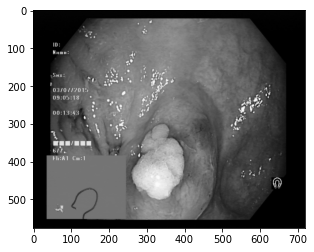

In [4]:
DATADIR ="C:/Users/tarik/Documents/jyputer/MLPROJ/kvasir-dataset"

CATEGORIES = ["dyed-lifted-polyps", "dyed-resection-margins", "esophagitis", "normal-cecum", "normal-pylorus", "normal-z-line", "polyps", "ulcerative-colitis"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')  
        plt.show()  
        break
          
    break  

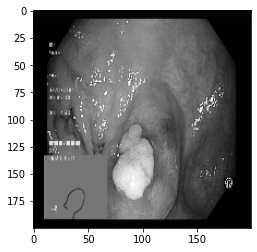

In [5]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []
for category in CATEGORIES:  # categories des photos
    path = os.path.join(DATADIR,category)  # cree path 
    class_num = CATEGORIES.index(category)  # recevoire la classe categorie
    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            #X.append(new_array)  # add this to our training_data
            #y.append(class_num)
            training_data.append([new_array, class_num])
 

100%|██████████| 500/500 [00:06<00:00, 78.84it/s]


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

2
7
4
5
0
4
1
1
6
3


In [9]:
X = []
#y = np.zeros((3824, 1), dtype='uint8')
y=[]
i = 0
for features,label in training_data:
    X.append(features)
    y.append(label)
    #y[i]=np.array(label)
    #i = i + 1

# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
y

In [10]:
import tensorflow 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [11]:
X = X/255.0

model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
model.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
model.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(32, activation='relu'))
model.add(tensorflow.keras.layers.Dense(10))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4

In [15]:
from tensorflow.keras.callbacks import TensorBoard


In [16]:
NAME = "medical_image"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [17]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X, np.array(y),
          epochs=10,
          callbacks=[tensorboard])
model.save('model5.model')

Epoch 1/10
125/125 [==============================] - 102s 816ms/step - loss: 1.4912 - accuracy: 0.3767
Epoch 2/10
125/125 [==============================] - 102s 820ms/step - loss: 1.0797 - accuracy: 0.5645
Epoch 3/10
125/125 [==============================] - 105s 841ms/step - loss: 0.8961 - accuracy: 0.6403
Epoch 4/10
125/125 [==============================] - 101s 808ms/step - loss: 0.6734 - accuracy: 0.7445
Epoch 5/10
125/125 [==============================] - 102s 817ms/step - loss: 0.4703 - accuracy: 0.8320
Epoch 6/10
125/125 [==============================] - 99s 794ms/step - loss: 0.2799 - accuracy: 0.9085
Epoch 7/10
125/125 [==============================] - 99s 794ms/step - loss: 0.1724 - accuracy: 0.9408
Epoch 8/10
125/125 [==============================] - 100s 803ms/step - loss: 0.1046 - accuracy: 0.9655
Epoch 9/10
125/125 [==============================] - 100s 801ms/step - loss: 0.0702 - accuracy: 0.9800
Epoch 10/10
125/125 [==============================] - 100s 797ms/

In [18]:
#%tensorboard --logdir=logs/.
%load_ext tensorboard
%tensorboard --logdir {logs_base_dir}

Reusing TensorBoard on port 6006 (pid 16380), started 21:49:33 ago. (Use '!kill 16380' to kill it.)

In [19]:
import cv2
import tensorflow as tf
DATADIR = "C:/Users/tarik/Documents/jyputer/MLPROJ/kvasir-dataset/test/"
CATEGORIES = ["dyed-lifted-polyps", "dyed-resection-margins", "esophagitis", "normal-cecum", "normal-pylorus", "normal-z-line", "polyps", "ulcerative-colitis"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        break          
    break 
model = tf.keras.models.load_model("model5.model")
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([new_array/255.0])
#print(prediction)  # contient une liste 

test_loss, test_acc = model.evaluate([new_array/255.0], np.array([0]), verbose=2)
test_acc

1/1 - 0s - loss: 0.1043 - accuracy: 1.0000


1.0

In [20]:
np.argmax(prediction)

0

In [ ]:
x = input('quelle categorie vous voullez testez ')
print('la categorie choisi est ', CATEGORIES[int(x)])

path = os.path.join(DATADIR,CATEGORIES[int(x)]) 
img = os.listdir(path)[np.random.randint(len(os.listdir(path)))]
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)


model = tensorflow.keras.models.load_model("model5.model")
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#probability_model = tensorflow.keras.Sequential([model, 
#                                         tensorflow.keras.layers.Softmax()])
prediction = model.predict([new_array/255.0])

#prediction = probability_model.predict(new_array/255.0)


In [ ]:
print('comparez les performances du modèle sur la photo du test')
test_loss, test_acc = model.evaluate([new_array/255.0], np.array([int(x)]), verbose=2)
test_acc

In [ ]:
int(prediction[0][np.argmax(prediction)])

CATEGORIES[int(np.argmax(prediction))]